In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
haw_m = Base.classes.measurement
haw_s = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
mrd = session.query(func.max(haw_m.date)).scalar()
print(mrd)


2017-08-23


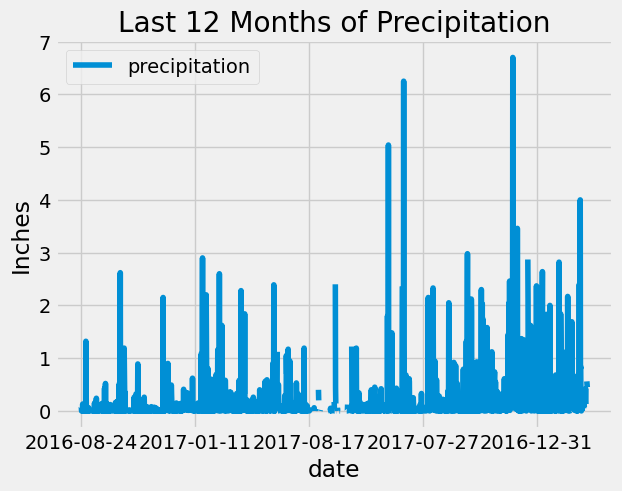

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.datetime.strptime(mrd, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prep_scores = session.query(haw_m.date, haw_m.prcp).\
        filter(haw_m.date >= year_ago).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names

prep_df = pd.DataFrame(prep_scores, columns=['date', 'precipitation'])

# Sort the dataframe by date
by_date_df = prep_df.sort_values(by='date')
# Use Pandas Plotting with Matplotlib to plot the data
prep_df.plot(x ='date')
plt.xlabel('date')
plt.ylabel('Inches')
plt.title('Last 12 Months of Precipitation')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prep_stats=prep_df.describe()
prep_stats.drop('count', inplace=True)
prep_stats.rename(index={'mean': 'Average', 'std': 'Standard Deviation', 'min': 'Mininum', '25%': '25th Percentile', '50%': 'Median', '75%': '75th Percentile', 'max': 'Maximum'}, inplace=True)
display(prep_stats)

,precipitation
Average,0.176462
Standard Deviation,0.460288
Mininum,0.000000
25th Percentile,0.000000
Median,0.020000
75th Percentile,0.130000
Maximum,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(haw_s.station).count()
total_stations 

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
high_active = session.query(haw_m.station, func.count(haw_m.station)).\
                group_by(haw_m.station).\
                order_by(func.count(haw_m.station).desc()).all()
print(high_active)



[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [24]:
# Using the most active station id from the previous query, 
#calculate the lowest, highest, and average temperature. 
num1_station_id = session.query(func.min(haw_m.tobs),
                                func.max(haw_m.tobs),
                                func.avg(haw_m.tobs)).\
                                filter(haw_m.station == high_active[0][0]).one()

num1_station_id





(54.0, 85.0, 71.66378066378067)

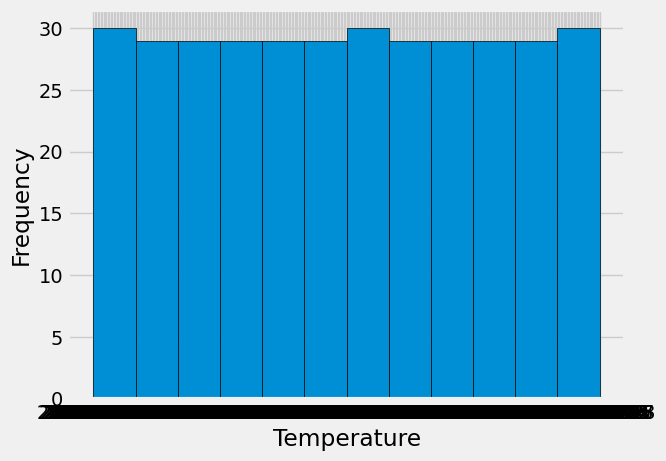

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data
#for this station and plot the results as a histogram

year_sum = session.query(haw_m.date, haw_m.tobs).\
            filter(haw_m.station == high_active[0][0]).\
            filter(haw_m.date >= year_ago).all()

year_sum_df = pd.DataFrame(year_sum, columns = ['Temperature', 'frequency'])



plt.hist(year_sum_df['Temperature'], bins=12, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()







# Close Session

In [ ]:
# Close Session
session.close()